<a href="https://colab.research.google.com/github/Gaurav-phatkare/Driver-Distraction-Drowsiness-Detection-System-using-deep-learning/blob/main/Training_Files/CNN_hyertuned_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import tensorflow_hub as hub
from tensorflow.keras import layers



In [ ]:
!unzip /content/drive/MyDrive/abcd.zip -d /content/EyeDataset

In [5]:

def print_directory_structure(directory, indent=0):
    for item in os.listdir(directory):
        path = os.path.join(directory, item)
        if os.path.isdir(path):
            print(f"{'    ' * indent}{os.path.basename(path)} - {len(os.listdir(path))} files")
            print_directory_structure(path, indent + 1)

eye_directory = '/content/Eyes_Dataset_v03'

print_directory_structure(eye_directory)

test_dataset - 2 files
    open_eye - 2197 files
    closed_eye - 2078 files
training_dataset - 2 files
    open_eye - 32169 files
    closed_eye - 31492 files
validation_dataset - 2 files
    open_eye - 8586 files
    closed_eye - 8376 files


In [6]:
files = 0
for _, _, filenames in os.walk(eye_directory):
  files += len(filenames)

print(f"Total images in dataset : {files}")

Total images in dataset : 84898


In [20]:



train_dir = "/content/Eyes_Dataset_v03/training_dataset/"
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( train_dir,
                                                     target_size=(128,128),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical'
                                                     )


val_dir = "/content/Eyes_Dataset_v03/validation_dataset/"
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True)


validation_generator =  validation_datagen.flow_from_directory( val_dir,
                                                                target_size=(128,128),
                                                                batch_size=32,
                                                                class_mode='categorical'
                                                                )

Found 63661 images belonging to 2 classes.
Found 16962 images belonging to 2 classes.


In [21]:
images, labels = train_generator.next()
images.shape

(32, 128, 128, 3)

## CNN model With Hypertuning

In [26]:
cnn_model04 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20,
                           3,
                           activation = tf.keras.layers.LeakyReLU(alpha = 0.3),
                           input_shape = (128,128,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    # tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    # tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = tf.keras.layers.LeakyReLU(alpha = 0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation = tf.keras.layers.LeakyReLU(alpha = 0.3)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

# compile a model
cnn_model04.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
                metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [27]:
cnn_model04.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 20)      560       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 10)        1810      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 10)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9000)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

In [28]:
cnn_model04_hist = cnn_model04.fit(train_generator,
                        epochs = 20,
                        steps_per_epoch = len(train_generator),
                        validation_data = validation_generator,
                        validation_steps = len(validation_generator))

Epoch 1/20
1990/1990 [==============================] - 122s 37ms/step - loss: 0.3102 - categorical_accuracy: 0.8706 - precision_4: 0.8706 - recall_4: 0.8706 - val_loss: 0.1929 - val_categorical_accuracy: 0.9267 - val_precision_4: 0.9267 - val_recall_4: 0.9267
Epoch 2/20
1990/1990 [==============================] - 74s 37ms/step - loss: 0.1771 - categorical_accuracy: 0.9350 - precision_4: 0.9350 - recall_4: 0.9350 - val_loss: 0.1471 - val_categorical_accuracy: 0.9474 - val_precision_4: 0.9474 - val_recall_4: 0.9474
Epoch 3/20
1990/1990 [==============================] - 73s 36ms/step - loss: 0.1496 - categorical_accuracy: 0.9455 - precision_4: 0.9455 - recall_4: 0.9455 - val_loss: 0.1423 - val_categorical_accuracy: 0.9464 - val_precision_4: 0.9464 - val_recall_4: 0.9464
Epoch 4/20
1990/1990 [==============================] - 74s 37ms/step - loss: 0.1334 - categorical_accuracy: 0.9521 - precision_4: 0.9521 - recall_4: 0.9521 - val_loss: 0.1189 - val_categorical_accuracy: 0.9568 - val_pr

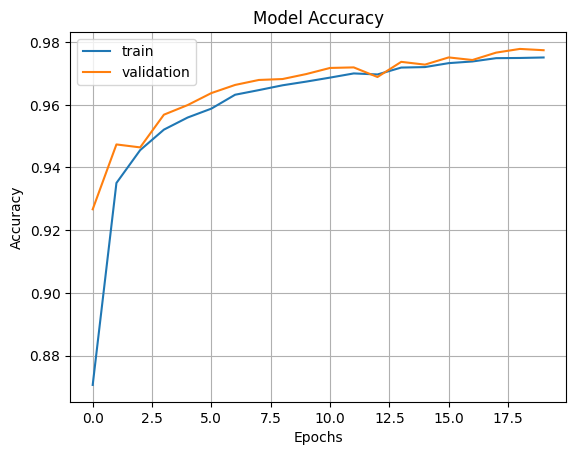

In [32]:
fig1 = plt.gcf()
plt.plot(cnn_model04_hist.history['categorical_accuracy'])
plt.plot(cnn_model04_hist.history['val_categorical_accuracy'])
# plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

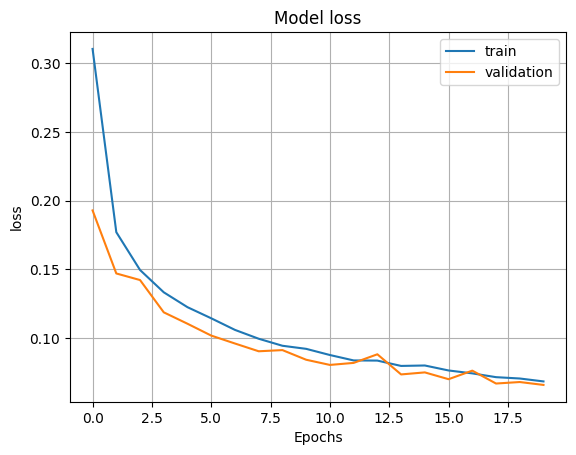

In [30]:
fig1 = plt.gcf()
plt.plot(cnn_model04_hist.history['loss'])
plt.plot(cnn_model04_hist.history['val_loss'])

plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

1/1 [==============================] - 0s 26ms/step


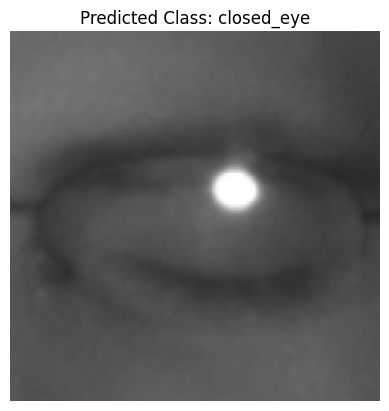

In [36]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_and_display(image_path, model):
    class_ls = ['closed_eye', 'open_eyes']

    img_height, img_width = 128,128


    image = cv2.imread(image_path)
    r_eye = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r_eye = cv2.resize(r_eye, (img_height, img_width))
    r_eye = r_eye / 255.0
    r_eye = r_eye.reshape((-1, img_height, img_width, 3))


    pred = model.predict(r_eye)


    predicted_class = int(np.argmax(pred))


    plt.imshow(r_eye.reshape((img_height, img_width, 3)))
    plt.title(f"Predicted Class: {class_ls[predicted_class]}")
    plt.axis('off')
    plt.show()

    return predicted_class
image_path = "/content/Eyes_Dataset_v03/test_dataset/closed_eye/s0012_01754_0_1_0_2_0_01.png"
predicted_class = predict_and_display(image_path, cnn_model04)

1/1 [==============================] - 0s 31ms/step


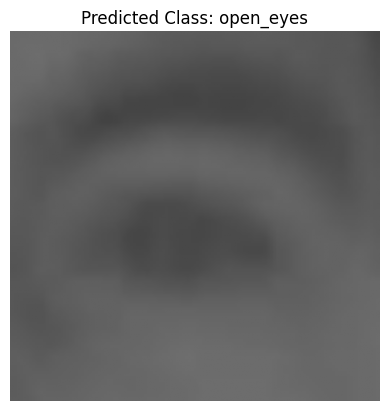

In [47]:
image_path = "/content/Eyes_Dataset_v03/test_dataset/open_eye/s0014_06142_0_0_1_0_1_01.png"
predicted_class = predict_and_display(image_path, cnn_model04)

In [49]:
cnn_model04.save("/content/model/cnn_v04.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## EfficientNet-imagenet

In [50]:
efficientnet_v2_imagenet1k_b0= "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

# setting trainable layers to false
def create_model(model_url, num_classes = 2):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'feature_extraction_layer',
                                           input_shape = (128,128,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [53]:
efficientnet_imagenet1k_b0_model = create_model(model_url = efficientnet_v2_imagenet1k_b0, num_classes = 2)

efficientnet_imagenet1k_b0_model.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

efficientnet_imagenet1k_b0_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 5921874 (22.59 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [55]:
# fit the model

efficientnet_imagenet_history = efficientnet_imagenet1k_b0_model.fit(
    train_generator,
    epochs = 15,
    steps_per_epoch = len(train_generator),
    validation_data = validation_generator,
    validation_steps = len(validation_generator)
)

Epoch 1/15
1990/1990 [==============================] - 87s 44ms/step - loss: 0.2098 - categorical_accuracy: 0.9217 - precision_5: 0.9217 - recall_5: 0.9217 - val_loss: 0.1729 - val_categorical_accuracy: 0.9363 - val_precision_5: 0.9363 - val_recall_5: 0.9363
Epoch 2/15
1990/1990 [==============================] - 82s 41ms/step - loss: 0.1577 - categorical_accuracy: 0.9438 - precision_5: 0.9438 - recall_5: 0.9438 - val_loss: 0.1583 - val_categorical_accuracy: 0.9447 - val_precision_5: 0.9447 - val_recall_5: 0.9447
Epoch 3/15
1990/1990 [==============================] - 81s 41ms/step - loss: 0.1406 - categorical_accuracy: 0.9505 - precision_5: 0.9505 - recall_5: 0.9505 - val_loss: 0.1343 - val_categorical_accuracy: 0.9533 - val_precision_5: 0.9533 - val_recall_5: 0.9533
Epoch 4/15
1990/1990 [==============================] - 81s 41ms/step - loss: 0.1308 - categorical_accuracy: 0.9547 - precision_5: 0.9547 - recall_5: 0.9547 - val_loss: 0.1261 - val_categorical_accuracy: 0.9573 - val_pre

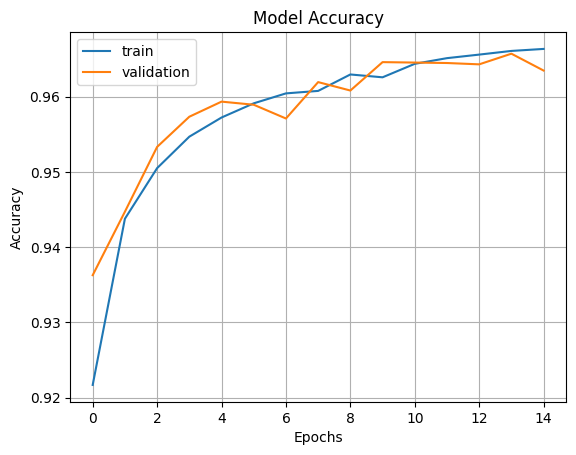

In [56]:
fig1 = plt.gcf()
plt.plot(efficientnet_imagenet_history.history['categorical_accuracy'])
plt.plot(efficientnet_imagenet_history.history['val_categorical_accuracy'])
# plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()